# Bernstein-Vazirani Algorithm

# An example of IBM Q Composer for Bernstein-Vazirani Algorithm

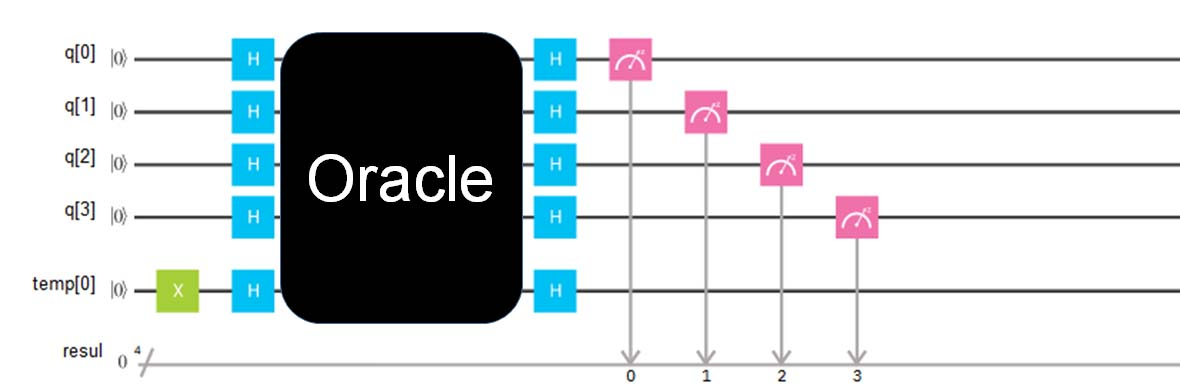

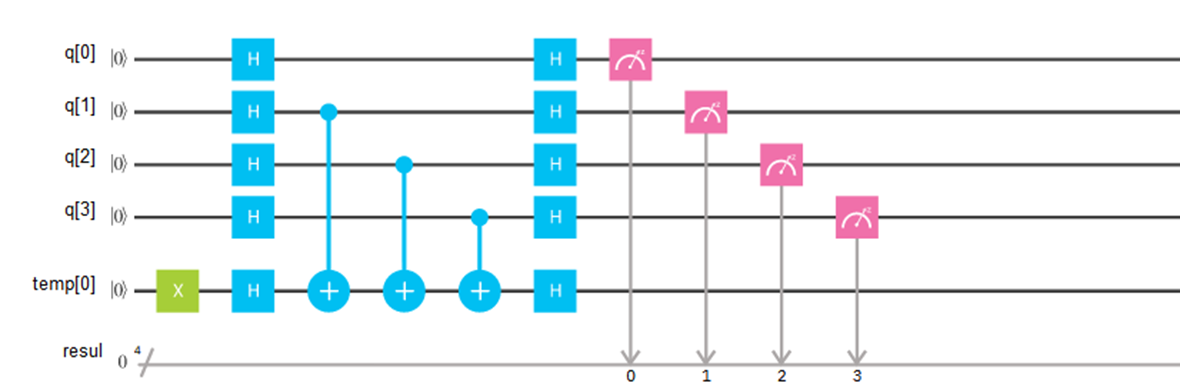

In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
IBMQ.load_accounts()

## 1. Create Oracle gates

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
q = QuantumRegister(4, 'q')
temp = QuantumRegister(1, 'temp')
c = ClassicalRegister(4, 'result')

## 2. Create secret 's'

In [3]:
s = 14 # 1110
oracle = QuantumCircuit(q, temp, c)
for i in range(len(q)):
    if (s & ( 1 << i)):
        oracle.cx(q[i], temp[0])

In [4]:
print(oracle.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q[4];
qreg temp[1];
creg result[4];
cx q[1],temp[0];
cx q[2],temp[0];
cx q[3],temp[0];



## 3. Create bernstein-vizarani gates

In [5]:
bv = QuantumCircuit(q, temp, c)
bv.x(temp[0])
#bv.barrier()
bv.h(q)
bv.h(temp[0])
#bv.barrier()
bv += oracle
#bv.barrier()
bv.h(q)
bv.h(temp[0])
#bv.barrier()
bv.measure(q, c)

In [6]:
print(bv.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q[4];
qreg temp[1];
creg result[4];
x temp[0];
h q[0];
h q[1];
h q[2];
h q[3];
h temp[0];
cx q[1],temp[0];
cx q[2],temp[0];
cx q[3],temp[0];
h q[0];
h q[1];
h q[2];
h q[3];
h temp[0];
measure q[0] -> result[0];
measure q[1] -> result[1];
measure q[2] -> result[2];
measure q[3] -> result[3];



## 4. Drawing the bernstein-vizarani gates 

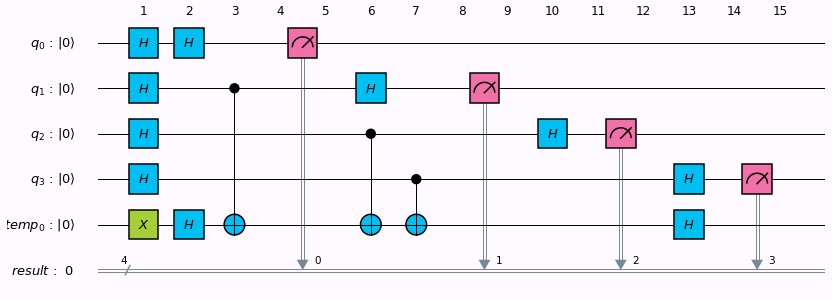

In [7]:
from qiskit.tools.visualization import circuit_drawer

style = {'cregbundle': True, 'usepiformat': True, 'subfontsize': 12, 'fold': 100, 'showindex': True,
         'backgroundcolor': '#fffaff',
         "displaycolor": { # Taken from qx_color_scheme() in _circuit_visualization.py
            "id": "#ffca64",
            "u0": "#f69458",
            "u1": "#f69458",
            "u2": "#f69458",
            "u3": "#f69458",
            "x": "#a6ce38",
            "y": "#a6ce38",
            "z": "#a6ce38",
            "h": "#00bff2",
            "s": "#00bff2",
            "sdg": "#00bff2",
            "t": "#ff6666",
            "tdg": "#ff6666",
            "rx": "#ffca64",
            "ry": "#ffca64",
            "rz": "#ffca64",
            "reset": "#d7ddda",
            "target": "#00bff2",
            "meas": "#f070aa"}}
bv.draw(output='mpl',style=style)
#circuit_drawer(bv, output='mpl', plot_barriers=True)

## 5. Run BV algorithm on Simulator

In [8]:
from qiskit import Aer, execute
# List the simulator backends
Aer.backends()
# Run 
backend = Aer.get_backend('qasm_simulator')
sim_job = execute(bv, backend)
job_result = sim_job.result()
print(job_result.get_counts())

{'1110': 1024}


## 5. Run BV algorithm on Quantum Processor

In [22]:
from qiskit import IBMQ, execute
from qiskit.tools.monitor import job_monitor
from qiskit.tools.visualization import plot_histogram, circuit_drawer

In [16]:
#IBMQ.enable_account(token, url)
IBMQ.save_account(token, url)

/Users/ohy/anaconda3/lib/python3.6/site-packages/qiskit/providers/ibmq/credentials/_configrc.py:129: UserWarning: Credentials already present. Set overwrite=True to overwrite.
  warnings.warn('Credentials already present. Set overwrite=True to overwrite.')


In [17]:
IBMQ.load_accounts()
IBMQ.backends()

/Users/ohy/anaconda3/lib/python3.6/site-packages/qiskit/providers/ibmq/ibmqprovider.py:251: UserWarning: Credentials are already in use.
  warnings.warn('Credentials are already in use.')


[<IBMQBackend('ibmqx4') from IBMQ()>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ()>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ()>,
 <IBMQBackend('ibmq_20_tokyo') from IBMQ(ibm-q-ncsu, nc-state, on-boarding)>,
 <IBMQBackend('ibmq_poughkeepsie') from IBMQ(ibm-q-ncsu, nc-state, on-boarding)>,
 <IBMQBackend('ibmq_qasm_simulator') from IBMQ(ibm-q-ncsu, nc-state, on-boarding)>]

In [18]:
device = IBMQ.get_backend('ibmq_20_tokyo')

In [19]:
# Submit job to real device and wait for results
job_device = execute(bv, device)
job_monitor(job_device)

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

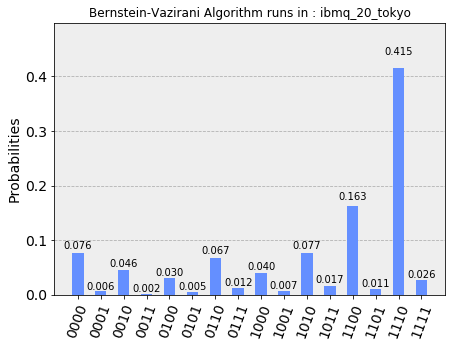

In [23]:
# Get results from completed execution
result_device = job_device.result()
counts_device = result_device.get_counts(0)
plot_histogram(counts_device, title='Bernstein-Vazirani Algorithm runs in : {}'.format(device.name()))